In [1]:
from sklearn.datasets import make_classification
import numpy as np
# yeh synthethic dataset form kar rahe hai
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [2]:
X

array([[ 0.19924745, -0.11697552],
       [-0.24882029, -0.73115232],
       [-0.3544904 , -0.7081059 ],
       [-1.59086506, -2.01199214],
       [-0.20083951,  1.63493163],
       [-0.83241122,  0.15599044],
       [-1.79207014,  1.07782053],
       [ 0.0856607 ,  0.80626713],
       [-0.55865299,  0.74859527],
       [-1.95974262,  0.75152794],
       [-1.77828947, -0.90114581],
       [-1.77985853, -0.1815243 ],
       [-0.02194151, -2.98092432],
       [ 0.80563431,  1.20500136],
       [-1.82701214,  0.78302407],
       [ 0.38730728,  0.42968688],
       [-0.14108668, -0.73229726],
       [-1.87955941, -0.83930476],
       [-0.18232911,  0.83727062],
       [-1.77059533, -0.10255323],
       [-2.27658028,  0.65867001],
       [-2.06519502,  0.92649819],
       [-1.31690551,  0.10216193],
       [ 1.61043259,  0.46886454],
       [-1.21650394,  0.45432938],
       [ 0.6139723 ,  1.8613386 ],
       [-1.78760957, -0.79255991],
       [-1.04149161, -1.0004391 ],
       [-2.40067584,

To add bias vertically downwards

X=np.insert(X,0,1,axis=1) 

To add anything horizontally 

X=np.insert(X,0,1,axis=0) 

In [3]:
import matplotlib.pyplot as plt

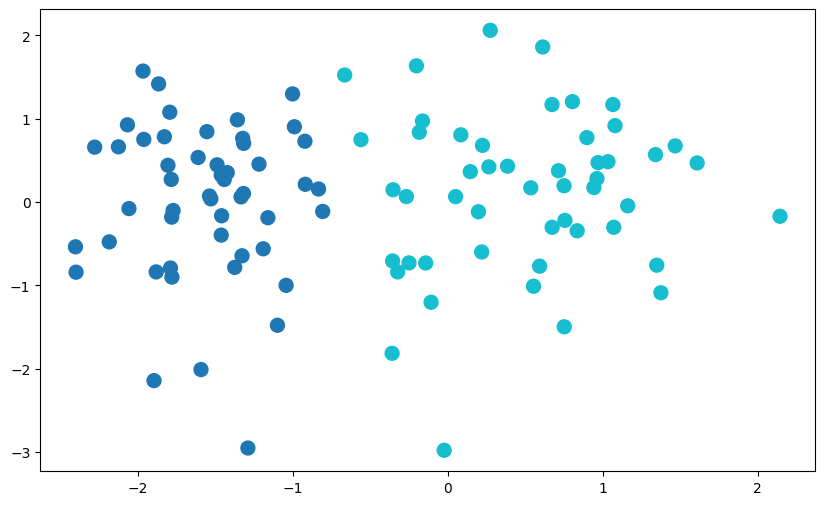

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='tab10',s=100)
# first 2 mera dataset ka part hai
# c=y mera hai ki output colour  y ka value ke hisaab se hoga
# cmpa mera colour theme hai
# s=100 size of the point

In [5]:
from matplotlib.pyplot import step


def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    # print(X)
    # print(X.shape[1])
    weights = np.ones(X.shape[1])
    # print(weights)
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    # print(weights) 
    return weights[0],weights[1:]
        

In [6]:
def step(z):
    return 1 if z>0 else 0

In [7]:
intercept_,coef_ = perceptron(X,y)

In [8]:
print(coef_)
print(intercept_)

[1.46305294 0.14721117]
0.9


In [9]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [10]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

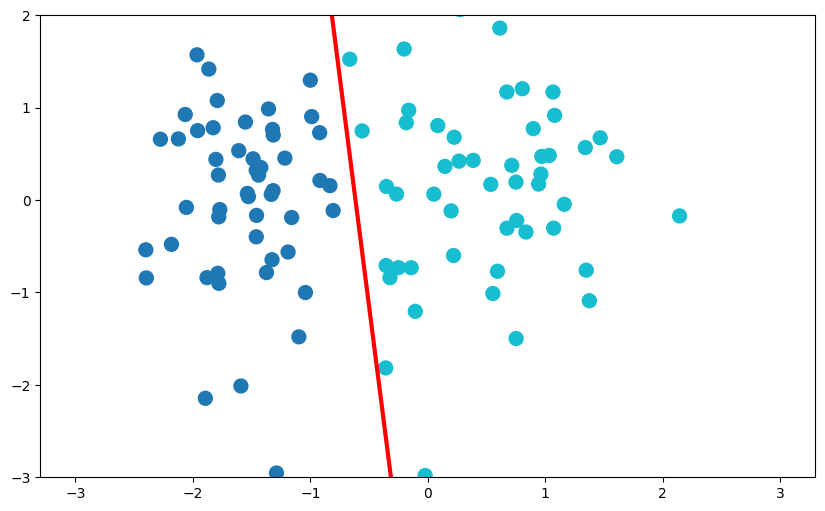

In [11]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='tab10',s=100)
plt.ylim(-3,2)

In [12]:
def perceptron1(X,y):
    m=[]
    b=[]
    
    X = np.insert(X,0,1,axis=1)
    # print(X)
    # print(X.shape[1])
    weights = np.ones(X.shape[1])
    # print(weights)
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    # print(weights) 
    return m,b

        

In [13]:
m,b=perceptron1(X,y)

In [14]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation


In [15]:
fig, ax = plt.subplots(figsize=(9,6))
x_input = np.arange(-3,3,0.1)
y_input = m[0]*x_input + b[0]

ax.scatter(X[:,0],X[:,1],c=y,cmap='tab10',s=100)
line, = ax.plot(x_input,y_input,'r-',linewidth=3)
plt.ylim(-3,2)

def update(i):
    label="epoch {0}".format(i)
    line.set_ydata(x_input*m[i]+b[i])
    ax.set_xlabel(label)
    # x_input = np.linspace(-3,3,100)
    # y_input = m[i]*x_input + b[i]
    # return line,

anim=FuncAnimation(fig,update, repeat=True, frames=200,interval=100)

anim.save("my_animation.gif", writer='pillow') # Or anim.save("my_animation.mp4", writer='ffmpeg')


<IPython.core.display.Javascript object>